In [50]:
# compare book reconciliation across the three different sources 
import pandas as pd

# load books dataset and the three other sources
books = pd.read_csv("../dataset_generator/data/SCoData_books_v1.1_2021-01.csv")
wikidata_matches = pd.read_csv("../dataset_generator/data/sco_books_wikidata.csv")
oclc_matches = pd.read_csv("../dataset_generator/data/mep-works-20210611T13 55 57.csv")
loc_matches = pd.read_csv("shxco_loc_matches_final.csv")

In [4]:
books.columns

Index(['uri', 'title', 'author', 'translator', 'editor', 'contributor',
       'illustrator', 'introduction', 'preface', 'photographer', 'year',
       'format', 'uncertain', 'ebook_url', 'volumes_issues', 'notes',
       'event_count', 'borrow_count', 'purchase_count', 'circulation_years',
       'updated'],
      dtype='object')

In [5]:
wikidata_matches.columns

Index(['book', 'bookLabel', 'authorLabel', 'genres', 'firstPublication',
       'sco_uri'],
      dtype='object')

In [6]:
oclc_matches.columns

Index(['Admin Link', 'ID', 'slug', 'title', 'Date of Publication', 'Authors',
       'MEP ID', 'Work URI', 'Edition URI', 'Genre_List', 'Format',
       'Subject_List', 'Events', 'Borrows', 'Purchases', 'notes'],
      dtype='object')

In [10]:
loc_matches.columns

Index(['sco_id', 'sco_title', 'title', 'sco_author', 'author', 'sco_date',
       'date', 'id', 'subject'],
      dtype='object')

In [51]:
# everything has uri except db export, which uses slug
# convert uris to slugs for merging
books["slug"] = books.uri.apply(lambda x: x.split("/")[-2])
wikidata_matches["slug"] = wikidata_matches.sco_uri.apply(lambda x: x.split("/")[-2])
loc_matches["slug"] = loc_matches.sco_id.apply(lambda x: x.split("/")[-2])

In [52]:
# merge all the fields we care about into the books df so we can compare reconciliation results

reconciled_books = books.copy()

# limit fields and rename for merging
merge_wikidata_matches = wikidata_matches[["slug", "book", "genres"]].rename({"genres": "wikidata_genres", "book": "wikidata_id"}, axis=1)
reconciled_books = reconciled_books.merge(merge_wikidata_matches, on="slug", how="left")

merge_oclc_matches = oclc_matches[["slug", "Work URI", "Genre_List", "Subject_List"]].rename({"Work URI": "oclc_id", "Genre_List": "oclc_genres", "Subject_List": "oclc_subjects"}, axis=1)
reconciled_books = reconciled_books.merge(merge_oclc_matches, on="slug", how="left")

merge_loc_matches = loc_matches[["slug", "id", "subject"]].rename({"id": "loc_id", "subject": "loc_subject"}, axis=1)
reconciled_books = reconciled_books.merge(merge_loc_matches, on="slug", how="left")

reconciled_books

,uri,title,author,translator,editor,contributor,illustrator,introduction,preface,photographer,...,circulation_years,updated,slug,wikidata_id,wikidata_genres,oclc_id,oclc_genres,oclc_subjects,loc_id,loc_subject
0,https://shakespeareandco.princeton.edu/books/m...,Le Morte d'Arthur,"Malory, Thomas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1937;1930;1939;1932;1938,2020-06-29T03:50:09+00:00,malory-morte-darthur,http://www.wikidata.org/entity/Q1136104,chivalric romance,NaN,NaN,NaN,http://lccn.loc.gov/85240163,arthurian romances
1,https://shakespeareandco.princeton.edu/books/m...,Utopia,"More, Thomas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1930;1950;1951,2020-04-30T19:40:14+00:00,more-utopia,http://www.wikidata.org/entity/Q404158,literature;political philosophy,http://worldcat.org/entity/work/id/5081,NaN,Utopias,http://lccn.loc.gov/00268291,utopias;early works to 1800
2,https://shakespeareandco.princeton.edu/books/n...,Gorboduc,"Norton, Thomas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1950,2020-06-29T03:49:47+00:00,norton-gorboduc,http://www.wikidata.org/entity/Q1038249,NaN,NaN,NaN,NaN,http://lccn.loc.gov/96195076,tragedies
3,https://shakespeareandco.princeton.edu/books/l...,Euphues: The Anatomy of Wit,"Lyly, John",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1941,2020-04-30T19:40:21+00:00,lyly-euphues-anatomy-wit,NaN,NaN,http://worldcat.org/entity/work/id/3856382311,NaN,NaN,http://lccn.loc.gov/12008363,triangles (interpersonal relations);naples (it...
4,https://shakespeareandco.princeton.edu/books/s...,The Shepheard's Calendar,"Spenser, Edmund",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1941,2020-06-29T03:45:41+00:00,spenser-shepheards-calendar,NaN,NaN,NaN,NaN,NaN,http://lccn.loc.gov/96133755,knights and knighthood;poetry;virtues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,https://shakespeareandco.princeton.edu/books/u...,[unclear]ile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-06-05T17:04:58+00:00,unclear-ile,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,https://shakespeareandco.princeton.edu/books/u...,[unclear]ism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1928,2020-06-02T22:08:10+00:00,unclear-ism,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,https://shakespeareandco.princeton.edu/books/u...,[unclear]y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1926,2020-08-17T19:32:28+00:00,unclear-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,https://shakespeareandco.princeton.edu/books/u...,[unidentified Benn’s Library],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1931,2020-06-02T22:10:06+00:00,unidentified-benn-s-library,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# how many matches for each source?
# TODO: still need to filter out bad matches from loc set based on manual review!!

print(f"{reconciled_books.shape[0]:,} total from books dataset")
print(f"{reconciled_books[reconciled_books.oclc_id.notna()].shape[0]:,} with oclc id")
print(f"{reconciled_books[reconciled_books.wikidata_id.notna()].shape[0]:,} with wikidata id")
print(f"{reconciled_books[reconciled_books.loc_id.notna()].shape[0]:,} with loc id")

6,041 total from books dataset
4,017 with oclc id
1,049 with wikidata id
4,869 with loc id


In [67]:
!pip install matplotlib_venn
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

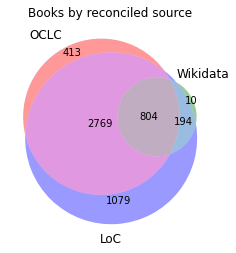

In [74]:
# three sources! venn diagram should work

oclc_reconciled = set(reconciled_books[reconciled_books.oclc_id.notna()].slug)
wikidata_reconciled = set(reconciled_books[reconciled_books.wikidata_id.notna()].slug)
loc_reconciled = set(reconciled_books[reconciled_books.loc_id.notna()].slug)

plt.title("Books by reconciled source")
venn3([oclc_reconciled, wikidata_reconciled, loc_reconciled], ('OCLC', 'Wikidata', 'LoC'))
plt.savefig("figures/books-reconciled-by-source.png")
plt.show()

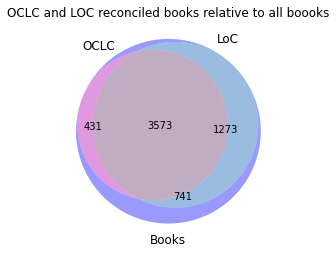

In [75]:
# what about as a percentage of all the books?
plt.title("OCLC and LOC reconciled books relative to all boooks")
venn3([oclc_reconciled, loc_reconciled, set(books.slug)], ('OCLC', 'LoC', 'Books'))
plt.savefig("figures/total-books-reconciled-oclc-loc.png")
plt.show()

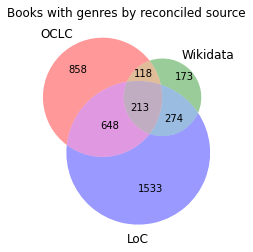

In [77]:
# ok, how about genre & subject information?

oclc_genres = set(reconciled_books[reconciled_books.oclc_genres.notna()].slug)
wikidata_genres = set(reconciled_books[reconciled_books.wikidata_genres.notna()].slug)
# loc data has subject and genre mixed
loc_genres = set(reconciled_books[reconciled_books.loc_subject.notna()].slug)

plt.title("Books with genres by reconciled source")
venn3([oclc_genres, wikidata_genres, loc_genres], ('OCLC', 'Wikidata', 'LoC'))
plt.savefig("figures/books-reconciled-with-genres.png")
plt.show()

In [62]:
print(f"{reconciled_books.shape[0]:,} total from books dataset")
print(f"{len(oclc_genres):,} with oclc genre")
print(f"{len(wikidata_genres):,} with wikidata genre")
print(f"{len(loc_genres):,} with loc genre")

6,041 total from books dataset
1,837 with oclc genre
778 with wikidata genre
2,668 with loc genre


In [66]:
# where we have genres from multiple sources, how similar are they?
allthree = reconciled_books[reconciled_books.oclc_genres.notna() & reconciled_books.wikidata_genres.notna() & reconciled_books.loc_subject.notna()]
allthree[["slug", "title", "oclc_genres", "loc_subject", "wikidata_genres"]].head(20)

,slug,title,oclc_genres,loc_subject,wikidata_genres
25,defoe-robinson-crusoe,Robinson Crusoe,Fiction,"crusoe, robinson (fictitious character);defoe,...",adventure novel;developmental novel;autobiography
40,fielding-amelia,Amelia,Fiction,married women;england;fiction,novel
42,paltock-life-adventures-peter,The Life and Adventures of Peter Wilkins,Fiction,adventure stories,adventure novel
54,gibbon-history-decline-fall,The History of the Decline and Fall of the Rom...,History,"byzantine empire;empire, 30 c.-476 a.d;rome;hi...",non-fiction
69,wyss-swiss-family-robinson,The Swiss Family Robinson,Fiction,juvenile works;robinsonades;families;juvenile ...,adventure novel
70,austen-pride-prejudice,Pride and Prejudice,Fiction,"pride and prejudice (austen, jane);england;ada...",satire;satire;psychological novel;novel of man...
71,austen-mansfield-park,Mansfield Park,Fiction,social life and customs;adoptees;england;count...,romance novel
73,austen-emma,Emma,Fiction; Humorous fiction; Love stories,social life and customs;examinations;england;m...,romance novel
79,scott-rob-roy,Rob Roy,Fiction; Roman anglais,outlaws;rob roy;fiction,historical novel;Bildungsroman
91,scott-fortunes-nigel,The Fortunes of Nigel,Fiction,james i;england;london (england);i;james;king ...,historical novel
